# 1. 구글 드라이브와 연결

In [19]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
# 경로 설정
import os
project_path = '/content/gdrive/My Drive/sw융합프로젝트(1)/'
print("프로젝트 폴더:", project_path)
print("포함된 파일 목록:", os.listdir(project_path))

프로젝트 폴더: /content/gdrive/My Drive/sw융합프로젝트(1)/
포함된 파일 목록: ['행정구역(읍면동)', '행정구역(시군구)', '인천광역시_시내버스 정류소 현황_20241231.csv', '인천광역시.geojson', '아파트(매매)_실거래가_20250512141056.csv', '연립다세대(전월세)_실거래가_20250512142423.csv', '아파트(전월세)_실거래가_20250512142547.csv', '연립다세대(매매)_실거래가_20250512142554.csv', 'multi_geocoded.csv', 'apt_geocoded.csv', '인천광역시_병원의원요양원 현황_20241107.csv', '인천광역시 서구_관내학교_20241018.csv', '인천광역시 서구_개교예정 학교_20241011.csv', '병원의원요양원_좌표포함.csv', '버스정류장_법정동매핑.geojson', '버스정류장_법정동매핑.csv', '병원_지오코딩.csv', '개교예정학교_지오코딩.csv', '학교_지오코딩.csv']


# 2. 병원, 학교, 개교예정 학교 데이터 불러오기

In [21]:
# 병원
import pandas as pd

hospital = project_path + '인천광역시_병원의원요양원 현황_20241107.csv'
hospital_df = pd.read_csv(hospital, encoding='euc-kr')

# 인천광역시 서구에 해당하는 병원만 필터링
hospital_df = hospital_df[hospital_df['소재지주소'].str.contains('인천광역시 서구', na=False)]
hospital_df.sample(5)

,연번,상호,병원구분,전화번호,우편번호,소재지주소,홈페이지
1699,1700,마트소아청소년과의원,의원,032-568-6977,22762,"인천광역시 서구 청라커낼로 252, (경서동)",NaN
1280,1281,연세두리소아청소년과의원,의원,032-562-6069,22647,"인천광역시 서구 원당대로 859, 302호 (원당동, 원당메디칼프라자)",NaN
1746,1747,검단서유승내과의원,의원,032-568-4588,22636,"인천광역시 서구 완정로 153, 이레메디칼센타 3층 (왕길동)",NaN
1754,1755,위풍당당정형외과의원,의원,032-567-7575,22636,"인천광역시 서구 검단로 480, 검단리치웰프라자 301~303호 (왕길동)",NaN
1544,1545,검암연세내과의원,의원,032-572-5126,22695,"인천광역시 서구 승학로483번길 18-8, (검암동)",NaN


In [22]:
# 학교
school = project_path + '인천광역시 서구_관내학교_20241018.csv'
school_df = pd.read_csv(school, encoding='euc-kr')
school_df.sample(5)

,연번,구분,학교명,학생수,소재지,교무실 전화번호,행정실 전화번호,데이터기준일자
5,6,초등학교,인천가현초등학교,1630,인천광역시 서구 염곡로 417(신현동 2-103번지),032-579-7388,032-579-7388,2024-10-18
60,61,중학교,불로중학교,758,인천광역시 서구 고산후로 363(불로동 306-22),032-455-8941,032-455-8906,2024-10-18
76,77,중학교,인천해원중학교,1041,인천광역시 서구 청라한내로 21(청라동 103-25),032-560-3600,032-560-3800,2024-10-18
68,69,중학교,인천당하중학교,1100,인천광역시 서구 청마로 38(당하동 1076-1번지),032-627-8058,032-569-2136,2024-10-18
96,97,고등학교,인천세무고등학교,500,인천광역시 서구 청마로52(당하동 943번지),032-460-1703,032-428-4523,2024-10-18


In [23]:
# 개교 예정 학교
planned_school = project_path + '인천광역시 서구_개교예정 학교_20241011.csv'
planned_school_df = pd.read_csv(planned_school, encoding='euc-kr')
planned_school_df.head()

,연번,연도,학교급별,교육청별,학교명(가칭),위치,학급수,개교 예정일,부지면적(제곱미터),사업방식(부지),사업방식(시설),사업비(백만원),비고,데이터기준일자
0,1,2025,유,서부,(검단7유치원),인천광역시 서구 불로동 249-4,15(3),2025-03-01,5340.0,재정,재정,25786,NaN,2024-10-11
1,2,2025,초,서부,(검단6초등학교),인천광역시 서구 불로동 247-49,50(2),2025-09-01,15000.0,무상,재정,66079,NaN,2024-10-11
2,3,2025,고,본청,(검단2고등학교),인천광역시 서구 원당동 92-9,42(1),2025-03-01,15000.0,무상,무상(일부재정),55156,공학,2024-10-11
3,4,2026,중,서부,(검단6중학교),인천광역시 서구 불로동 247-16,39(1),2026-03-01,15000.0,무상,재정,62300,공학,2024-10-11
4,5,2026,중,서부,(오류중학교),인천광역시 서구 오류동 1723-15,36(1),2026-03-01,13278.2,재정,재정,56700,공학,2024-10-11


# 3. GeoDataFrame으로 변환

In [24]:
# 인천광역시 서구 병원 의원 요양원, 지번 주소로 직접 저장
hospital_df.loc[hospital_df['상호'] == '남동성모외과의원', '소재지주소'] = '인천광역시 남동구 호구포로790번길 12(구월동)' # 인천광역시 남동구 호구포로 788-16 / 기초주소 -> 도로명 (https://www.juso.go.kr/openIndexPage.do)'
hospital_df.loc[hospital_df['상호'] == '인천구치소부속의원', '소재지주소'] = '인천광역시 미추홀구 학익동 278'      # 인천광역시 미추홀구 학익소로 30, (학익동)

# 서구 관내 학교 실패 장소, 도로명 새로 저장
school_df.loc[school_df['학교명'] == '인천도담초등학교', '소재지'] = '인천광역시 서구 청라커낼로 217 (청라동)' # 인천광역시 서구 청라커넬로 217(청라동178-8번지)
school_df.loc[school_df['학교명'] == '인천신현초등학교', '소재지'] = '인천광역시 서구 율도로77번길 1 (신현동)' # 인천광역시 서구 율도로77번길 (신현동 1번지)
school_df.loc[school_df['학교명'] == '인천왕길초등학교', '소재지'] = '인천광역시 서구 봉수대로1440번길 20 (왕길동)' # 인천광역시 서구 봉수대로 1440번길(왕길동 649-3번지)
school_df.loc[school_df['학교명'] == '인천초은초등학교', '소재지'] = '인천광역시 서구 청라에메랄드로 33 (청라동)' # 인천광역시 서구 에메랄드로 33(청라동 192-3번지)
school_df.loc[school_df['학교명'] == '인천청라고등학교', '소재지'] = '인천광역시 서구 담지로86번길 16-14 (청라동)' # 인천광역시 서구 담지로 86(청라동 137-2)

# 인천광역시 서구_개교예정 학교
planned_school_df.loc[planned_school_df['위치'] == '인천광역시 서구 원당동 92-9', '위치'] = '인천광역시 서구 이음1로 469' # 직접 학교명 검색 후 주소 찾음


In [25]:
import pandas as pd
import requests
import urllib.parse
from tqdm import tqdm
from functools import partial

# Kakao API 키 설정
KAKAO_REST_KEY = input("Kakao REST API 키만 입력하세요 (KakaoAK 생략): ").strip()
KAKAO_API_KEY = f'KakaoAK {KAKAO_REST_KEY}'

# 실패 주소 저장용 리스트
hospital_failed = []
school_failed = []
planned_school_failed = []

# 지오코딩 함수
def kakao_geocode(address, dataset_name):
    try:
        address = address.split('(')[0].strip()  # 괄호 제거

        query = urllib.parse.quote(address)
        url = f'https://dapi.kakao.com/v2/local/search/address.json?query={query}'
        headers = {'Authorization': KAKAO_API_KEY}

        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            result = response.json()
            if result['documents']:
                coords = result['documents'][0]['address']
                return pd.Series([coords['y'], coords['x']])
            else:
                print(f"[주소 미찾음] {address}")
                if dataset_name == 'hospital':
                    hospital_failed.append(address)
                elif dataset_name == 'school':
                    school_failed.append(address)
                else:
                    planned_school_failed.append(address)
        else:
            print(f"[API 오류 {response.status_code}] {address}")
            if dataset_name == 'hospital':
                hospital_failed.append(address)
            elif dataset_name == 'school':
                school_failed.append(address)
            else:
                planned_school_failed.append(address)
    except Exception as e:
        print(f"[예외 발생] {address} → {e}")
        if dataset_name == 'hospital':
            hospital_failed.append(address)
        elif dataset_name == 'school':
            school_failed.append(address)
        else:
            planned_school_failed.append(address)
    return pd.Series([None, None])

# tqdm 적용
tqdm.pandas()

# 주소 정제
hospital_df['주소_정제'] = hospital_df['소재지주소'].str.split(',').str[0].str.strip()
school_df['주소_정제'] = school_df['소재지'].str.split(',').str[0].str.strip()
planned_school_df['주소_정제'] = planned_school_df['위치'].str.split(',').str[0].str.strip()

# 병원 지오코딩
print("병원 및 의원 지오코딩 중...")
hospital_df[['위도', '경도']] = hospital_df['주소_정제'].progress_apply(
    partial(kakao_geocode, dataset_name='hospital')
)

# 학교 지오코딩
print("학교 지오코딩 중...")
school_df[['위도', '경도']] = school_df['주소_정제'].progress_apply(
    partial(kakao_geocode, dataset_name='school')
)

# 개교예정 학교 지오코딩
print("개교예정 학교 지오코딩 중...")
planned_school_df[['위도', '경도']] = planned_school_df['주소_정제'].progress_apply(
    partial(kakao_geocode, dataset_name='planned_school')
)

# 필요한 열만 남기기
hospital_df = hospital_df[['상호', '소재지주소', '위도', '경도']]
school_df = school_df[['학교명', '소재지', '위도', '경도']]
planned_school_df = planned_school_df[['학교명(가칭)', '위치', '위도', '경도']]

# 결과 저장
hospital_df.to_csv(project_path + '병원_지오코딩.csv', index=False, encoding='utf-8-sig')
school_df.to_csv(project_path + '학교_지오코딩.csv', index=False, encoding='utf-8-sig')
planned_school_df.to_csv(project_path + '개교예정학교_지오코딩.csv', index=False, encoding='utf-8-sig')


Kakao REST API 키만 입력하세요 (KakaoAK 생략): 7bc29ad53927d7c84514b6cd27e8d380
병원 및 의원 지오코딩 중...


100%|██████████| 344/344 [03:13<00:00,  1.78it/s]


학교 지오코딩 중...


100%|██████████| 98/98 [00:55<00:00,  1.77it/s]


개교예정 학교 지오코딩 중...


100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


### 변환 실패한 장소?
- 파라미터 변경해서 확인

  https://api.vworld.kr/req/address?service=address&request=getcoord&format=json&crs=EPSG:4326&type=road&key=5C84C8C1-1E4A-3532-9766-29EE518ED89A&address=%EC%9D%B8%EC%B2%9C%EA%B4%91%EC%97%AD%EC%8B%9C%20%EC%84%9C%EA%B5%AC%20%EB%8B%B4%EC%A7%80%EB%A1%9C%2086

- query 바꿔서 확인
[링크 텍스트](https://)
  https://developers.kakao.com/tool/rest-api/open/get/v2-local-search-address.%7Bformat%7D

- 도로명주소 변환 공식 사이트에서 변환 [도로명주소로 변환](https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressConvert)

- 기초 주소인지, 지번 주소인지, 도로명 주소인지 확인
[주소 확인](https://www.juso.go.kr/openIndexPage.do)

- 직접 소재지명을 통해 구글 검색

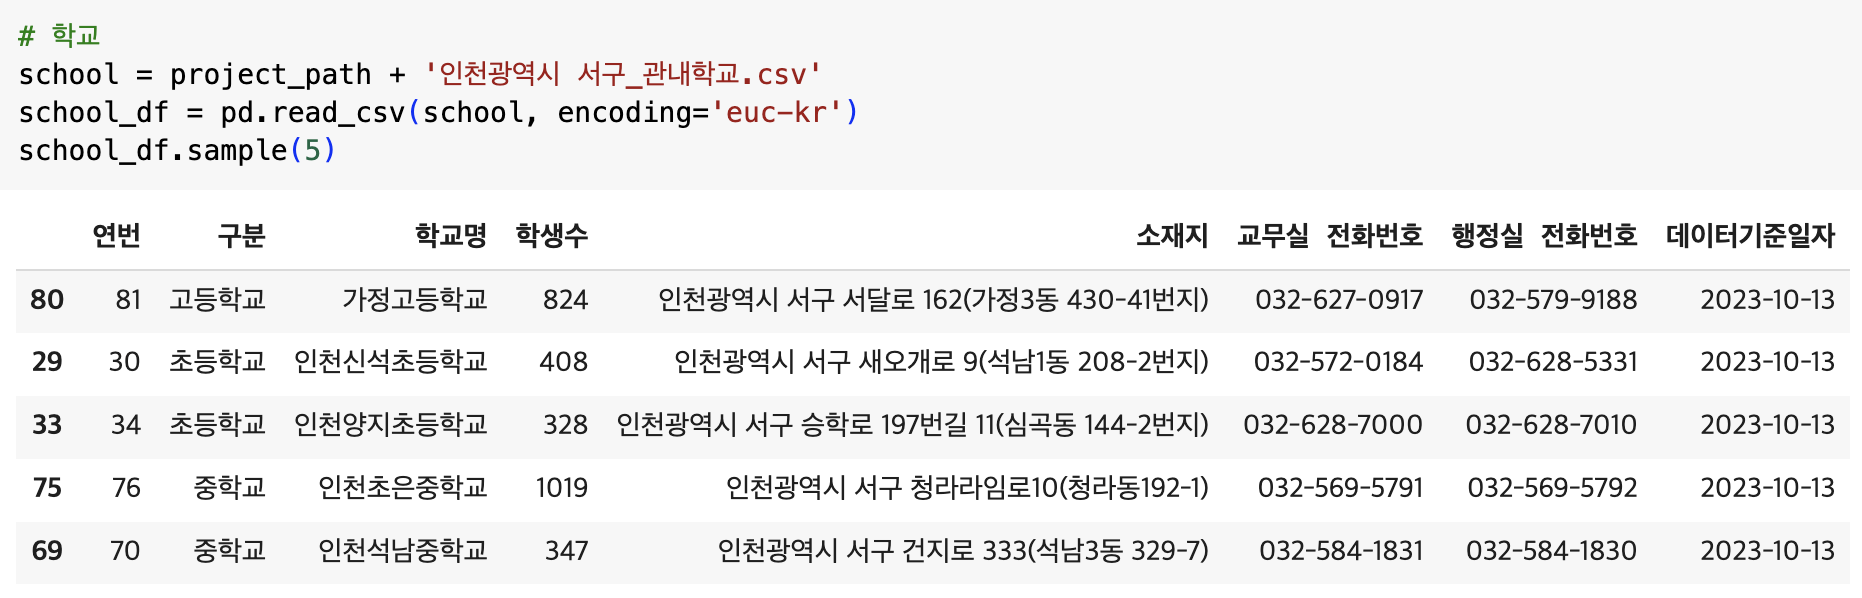

인천광역시 서구_관내학교.csv 의 소재지는 도로명 주소(지번 주소)로 되어있는데 지오코딩이 안된 곳이 일부 있음

[도로명주소 변환 사이트](https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressConvert) 에서 괄호 안 지번주소를 이용해 변환 실패한 행에만 적용

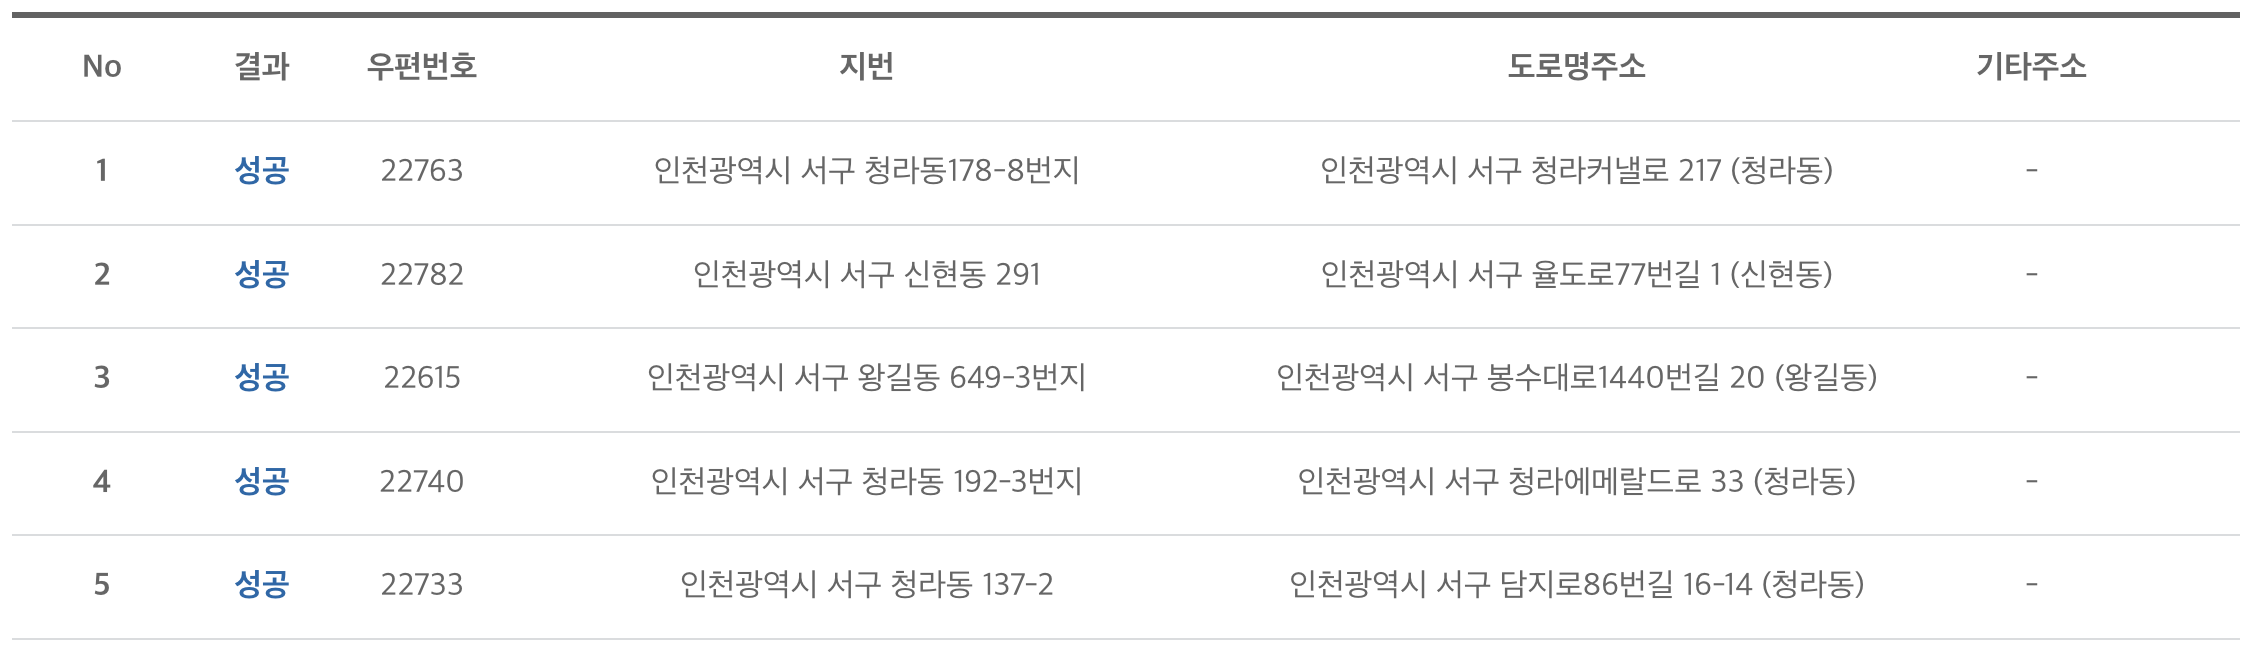

### vworld를 이용한 변환 코드 (미사용)


In [ ]:
## vword를 이용한 변환 코드

# import requests
# import pandas as pd
# from urllib.parse import quote

# # VWorld API 키 입력
# VWORLD_API_KEY = input("VWorld API 키를 입력하세요: ").strip()

# # VWorld 지오코딩 함수
# def vworld_geocode(address):
#     try:
#         query = quote(address)
#         url = (
#             f"https://api.vworld.kr/req/address"
#             f"?service=address"
#             f"&request=getcoord"
#             f"&format=json"
#             f"&crs=EPSG:4326"
#             f"&key={VWORLD_API_KEY}"
#             f"&address={query}"
#         )

#         response = requests.get(url)
#         if response.status_code == 200:
#             result = response.json()
#             if result['response']['status'] == 'OK':
#                 point = result['response']['result']['point']
#                 return pd.Series([point['y'], point['x']])  # 위도, 경도
#             else:
#                 print(f"[주소 미찾음] {address}")
#                 return pd.Series([None, None])
#         else:
#             print(f"[API 오류 {response.status_code}] {address}")
#             return pd.Series([None, None])
#     except Exception as e:
#         print(f"[예외 발생] {address} → {e}")
#         return pd.Series([None, None])


# 4. 시각화 (Folium)

In [28]:
!pip install geopandas folium shapely pyproj --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 6.1 MB/s eta 0:00:00


In [30]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
from shapely.ops import nearest_points

# 데이터 불러오기
hospital_df = pd.read_csv(project_path + '병원_지오코딩.csv')
school_df = pd.read_csv(project_path + '학교_지오코딩.csv')
planned_school_df = pd.read_csv(project_path + '개교예정학교_지오코딩.csv')
bus_df = pd.read_csv(project_path + '버스정류장_법정동매핑.csv')
bus_gdf = gpd.read_file(project_path + '버스정류장_법정동매핑.geojson')

# GeoDataFrame으로 변환
hospital_gdf = gpd.GeoDataFrame(
    hospital_df, geometry=gpd.points_from_xy(hospital_df['경도'], hospital_df['위도']), crs='EPSG:4326'
).to_crs(epsg=5181)

school_gdf = gpd.GeoDataFrame(
    school_df, geometry=gpd.points_from_xy(school_df['경도'], school_df['위도']), crs='EPSG:4326'
).to_crs(epsg=5181)

planned_school_gdf = gpd.GeoDataFrame(
    planned_school_df, geometry=gpd.points_from_xy(planned_school_df['경도'], planned_school_df['위도']), crs='EPSG:4326'
).to_crs(epsg=5181)

bus_gdf = bus_gdf.to_crs(epsg=5181)

# 반경 500m 내 정류장이 있는지 확인하는 함수
def find_without_bus(gdf, bus_gdf, name_col):
    gdf['정류장_500m_내_유무'] = gdf.geometry.apply(
        lambda x: bus_gdf.distance(x).min() <= 500
    )
    return gdf[gdf['정류장_500m_내_유무'] == False][[name_col, 'geometry']]

# 정류장 없는 곳 필터링
hospital_no_bus = find_without_bus(hospital_gdf, bus_gdf, '상호')
school_no_bus = find_without_bus(school_gdf, bus_gdf, '학교명')
planned_school_no_bus = find_without_bus(planned_school_gdf, bus_gdf, '학교명(가칭)')

# 지도 시각화 (Folium 사용)
m = folium.Map(location=[37.5, 126.7], zoom_start=11)

# 점 찍기 함수
def add_points(gdf, color, label_col, group_name):
    for _, row in gdf.iterrows():
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=6,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=row[label_col]
        ).add_to(group_name)

# FeatureGroup으로 구분
hospital_layer = folium.FeatureGroup(name='병원(500m 내 정류장 없음)', show=True)
school_layer = folium.FeatureGroup(name='학교(500m 내 정류장 없음)', show=True)
planned_school_layer = folium.FeatureGroup(name='개교예정학교(500m 내 정류장 없음)', show=True)

add_points(hospital_no_bus.to_crs(epsg=4326), 'red', '상호', hospital_layer)
add_points(school_no_bus.to_crs(epsg=4326), 'blue', '학교명', school_layer)
add_points(planned_school_no_bus.to_crs(epsg=4326), 'green', '학교명(가칭)', planned_school_layer)

hospital_layer.add_to(m)
school_layer.add_to(m)
planned_school_layer.add_to(m)

folium.LayerControl().add_to(m)

# 저장
m.save(project_path + '정류장_미존재_위치_지도.html')
m

In [32]:
# 500m 반경 내 버스정류장이 없는 장소 리스트 출력
print("500m 반경 내 버스정류장이 없는 장소 목록:\n")

def print_place_info(gdf, name_col, address_col_name, category):
    print(f"▶ {category}")
    for _, row in gdf.iterrows():
        print(f"장소명 : {row[name_col]}")
        print(f"주소 : {row[address_col_name]}\n")

# 주소 열 포함하도록 merge
hospital_no_bus = hospital_no_bus.merge(hospital_df[['상호', '소재지주소']], on='상호', how='left')
school_no_bus = school_no_bus.merge(school_df[['학교명', '소재지']], on='학교명', how='left')
planned_school_no_bus = planned_school_no_bus.merge(planned_school_df[['학교명(가칭)', '위치']], on='학교명(가칭)', how='left')

# 출력
print_place_info(hospital_no_bus, '상호', '소재지주소', '병원 및 의원')
print_place_info(school_no_bus, '학교명', '소재지', '학교')
print_place_info(planned_school_no_bus, '학교명(가칭)', '위치', '개교예정 학교')

500m 반경 내 버스정류장이 없는 장소 목록:

▶ 병원 및 의원
장소명 : 서온요양병원
주소 : 인천광역시 서구 도곡로 172-5, 서온요양병원 가,나동 (대곡동)

▶ 학교
▶ 개교예정 학교
